===========iteration:0===========
SGD:2.354317107127693
Momentum:2.399850283324713
AdaGrad:2.087584836202768
Adam:2.184644536359664
===========iteration:100===========
SGD:1.4766412334848114
Momentum:0.358274732400931
AdaGrad:0.12083101482787671
Adam:0.22539744500392517
===========iteration:200===========
SGD:0.716932180004804
Momentum:0.2538391352248703
AdaGrad:0.1324143114386338
Adam:0.19338792164152646
===========iteration:300===========
SGD:0.4176896511428648
Momentum:0.20983467724374122
AdaGrad:0.06409128747287746
Adam:0.11080362881653134
===========iteration:400===========
SGD:0.36310333520810356
Momentum:0.13807430357334563
AdaGrad:0.06832877123012311
Adam:0.1266256607814812
===========iteration:500===========
SGD:0.45741198056783605
Momentum:0.263017099758657
AdaGrad:0.11340298644153496
Adam:0.2127641994041475
===========iteration:600===========
SGD:0.4794468099310569
Momentum:0.2439090226000637
AdaGrad:0.07645729220192818
Adam:0.08837527156291536
===========iteration:700======

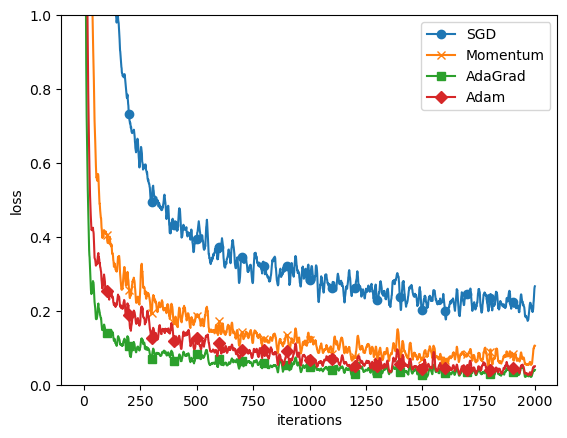

In [1]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
optimizers = {}
optimizers["SGD"] = SGD()
optimizers["Momentum"] = Momentum()
optimizers["AdaGrad"] = AdaGrad()
optimizers["Adam"] = Adam()
# optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100], output_size=10
    )
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(
        x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key
    )
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


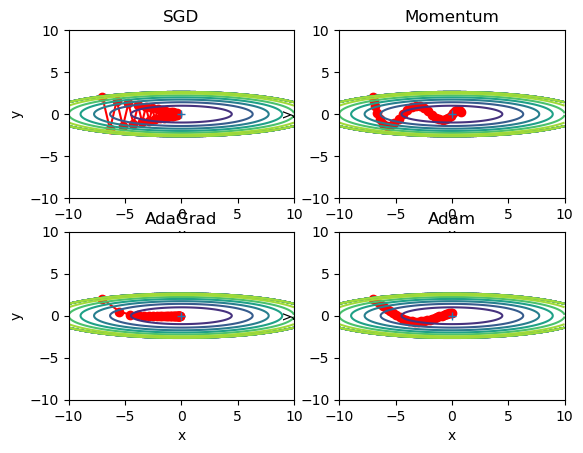

In [6]:
# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0 * y


init_pos = (-7.0, 2.0)
params = {}
params["x"], params["y"] = init_pos[0], init_pos[1]
grads = {}
grads["x"], grads["y"] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params["x"], params["y"] = init_pos[0], init_pos[1]

    for i in range(30):
        x_history.append(params["x"])
        y_history.append(params["y"])

        grads["x"], grads["y"] = df(params["x"], params["y"])
        optimizer.update(params, grads)

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)

    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    # for simple contour line
    mask = Z > 7
    Z[mask] = 0
    # plot
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, "o-", color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, "+")
    # colorbar()
    # spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")

plt.show()

`meshgrid`で遊んでみる


In [5]:
X = np.arange(1, 10)
Y = np.arange(1, 10)
mesh = np.meshgrid(X, Y)
mesh

[array([[1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5, 5, 5, 5],
        [6, 6, 6, 6, 6, 6, 6, 6, 6],
        [7, 7, 7, 7, 7, 7, 7, 7, 7],
        [8, 8, 8, 8, 8, 8, 8, 8, 8],
        [9, 9, 9, 9, 9, 9, 9, 9, 9]])]

# 隠れ層のアクティベーション分布

アクティベーションとは活性化関数の後の出力データを指す。

隠れ層のアクティベーションを観察することで得られるものがあるという。

この実験では 5 層のニューラルネットワークにランダムに生成した入力を与える。そして各層のアクティベーションのデータ分布をヒストグラムで見るという実験。


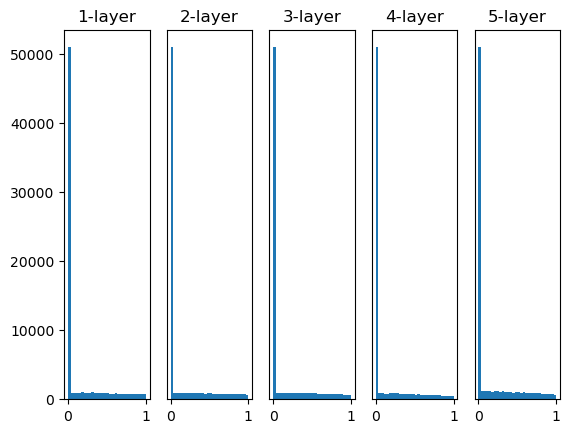

In [5]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)


input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        # 最初のループ以降では、入力データは前層の出力結果とする
        x = activations[i - 1]

    # 初期値の値をいろいろ変えて実験しよう！
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    # 活性化関数の種類も変えて実験しよう！
    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)x

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i + 1) + "-layer")
    if i != 0:
        plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

===========iteration:0===========
std=0.01:2.302498201875393
Xavier:2.3179445616964127
He:2.3466372070293993
===========iteration:100===========
std=0.01:2.3025222723703713
Xavier:2.267855470843191
He:1.6312715511359177
===========iteration:200===========
std=0.01:2.3026770605806384
Xavier:2.2054388804387015
He:0.8705100067932006
===========iteration:300===========
std=0.01:2.3021440428199638
Xavier:1.9924894664966422
He:0.5927594259686587
===========iteration:400===========
std=0.01:2.301647274707504
Xavier:1.5995892659326172
He:0.44015023057874686
===========iteration:500===========
std=0.01:2.2998342757826804
Xavier:1.1428016402944743
He:0.3289643240757184
===========iteration:600===========
std=0.01:2.303224929565179
Xavier:0.7545370526645605
He:0.35481962505441084
===========iteration:700===========
std=0.01:2.302176425716584
Xavier:0.6419084264929027
He:0.303572699949199
===========iteration:800===========
std=0.01:2.2960096613831373
Xavier:0.6149769775957861
He:0.371650980767199

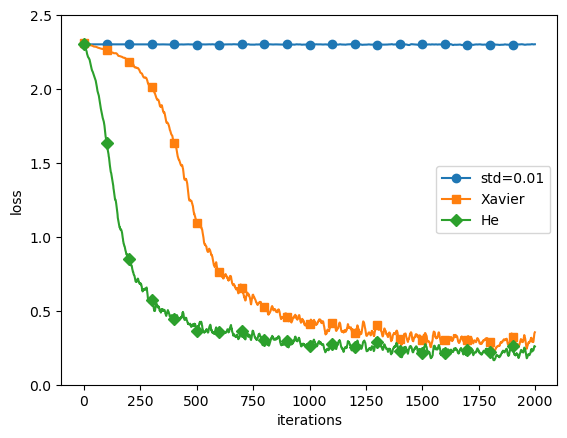

In [1]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {"std=0.01": 0.01, "Xavier": "sigmoid", "He": "relu"}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(
        input_size=784,
        hidden_size_list=[100, 100, 100, 100],
        output_size=10,
        weight_init_std=weight_type,
    )
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {"std=0.01": "o", "Xavier": "s", "He": "D"}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(
        x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key
    )
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

============== 1/16 ==============
epoch:0 | 0.105 - 0.096


/Users/danfuji/Documents/Projects/deep-learning-from-scratch/common/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/Users/danfuji/Documents/Projects/deep-learning-from-scratch/common/multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in scalar multiply
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.13
epoch:2 | 0.097 - 0.15
epoch:3 | 0.097 - 0.191
epoch:4 | 0.097 - 0.226
epoch:5 | 0.097 - 0.245
epoch:6 | 0.097 - 0.273
epoch:7 | 0.097 - 0.284
epoch:8 | 0.097 - 0.309
epoch:9 | 0.097 - 0.317
epoch:10 | 0.097 - 0.34
epoch:11 | 0.097 - 0.352
epoch:12 | 0.097 - 0.366
epoch:13 | 0.097 - 0.367
epoch:14 | 0.097 - 0.395
epoch:15 | 0.097 - 0.4
epoch:16 | 0.097 - 0.418
epoch:17 | 0.097 - 0.422
epoch:18 | 0.097 - 0.451
epoch:19 | 0.097 - 0.443


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


============== 2/16 ==============
epoch:0 | 0.093 - 0.094


/Users/danfuji/Documents/Projects/deep-learning-from-scratch/common/functions.py:32: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=-1, keepdims=True)   # オーバーフロー対策


epoch:1 | 0.097 - 0.105
epoch:2 | 0.097 - 0.115
epoch:3 | 0.097 - 0.131
epoch:4 | 0.097 - 0.147
epoch:5 | 0.097 - 0.163
epoch:6 | 0.097 - 0.188
epoch:7 | 0.097 - 0.207
epoch:8 | 0.097 - 0.225
epoch:9 | 0.097 - 0.27
epoch:10 | 0.097 - 0.297
epoch:11 | 0.097 - 0.326
epoch:12 | 0.097 - 0.343
epoch:13 | 0.097 - 0.353
epoch:14 | 0.097 - 0.383
epoch:15 | 0.097 - 0.394
epoch:16 | 0.097 - 0.419
epoch:17 | 0.097 - 0.446
epoch:18 | 0.097 - 0.462


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.097 - 0.48
============== 3/16 ==============
epoch:0 | 0.104 - 0.109
epoch:1 | 0.39 - 0.092
epoch:2 | 0.557 - 0.142
epoch:3 | 0.653 - 0.174
epoch:4 | 0.738 - 0.211
epoch:5 | 0.784 - 0.236
epoch:6 | 0.812 - 0.269
epoch:7 | 0.848 - 0.293
epoch:8 | 0.887 - 0.338
epoch:9 | 0.908 - 0.358
epoch:10 | 0.934 - 0.387
epoch:11 | 0.961 - 0.424
epoch:12 | 0.971 - 0.438
epoch:13 | 0.976 - 0.476
epoch:14 | 0.981 - 0.497
epoch:15 | 0.988 - 0.521
epoch:16 | 0.985 - 0.541
epoch:17 | 0.992 - 0.558


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.994 - 0.578
epoch:19 | 0.994 - 0.606
============== 4/16 ==============
epoch:0 | 0.094 - 0.093
epoch:1 | 0.23 - 0.115
epoch:2 | 0.342 - 0.186
epoch:3 | 0.433 - 0.268
epoch:4 | 0.498 - 0.339
epoch:5 | 0.554 - 0.401
epoch:6 | 0.619 - 0.463
epoch:7 | 0.647 - 0.506
epoch:8 | 0.688 - 0.569
epoch:9 | 0.705 - 0.604
epoch:10 | 0.733 - 0.637
epoch:11 | 0.751 - 0.656
epoch:12 | 0.776 - 0.684
epoch:13 | 0.786 - 0.707
epoch:14 | 0.805 - 0.737
epoch:15 | 0.815 - 0.747
epoch:16 | 0.817 - 0.769
epoch:17 | 0.838 - 0.78
epoch:18 | 0.849 - 0.792


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.86 - 0.805
============== 5/16 ==============
epoch:0 | 0.072 - 0.101
epoch:1 | 0.075 - 0.147
epoch:2 | 0.085 - 0.272
epoch:3 | 0.107 - 0.423
epoch:4 | 0.118 - 0.53
epoch:5 | 0.145 - 0.603
epoch:6 | 0.171 - 0.679
epoch:7 | 0.195 - 0.736
epoch:8 | 0.215 - 0.765
epoch:9 | 0.248 - 0.784
epoch:10 | 0.271 - 0.803
epoch:11 | 0.284 - 0.822
epoch:12 | 0.308 - 0.83
epoch:13 | 0.315 - 0.84
epoch:14 | 0.328 - 0.852
epoch:15 | 0.337 - 0.865
epoch:16 | 0.354 - 0.869
epoch:17 | 0.359 - 0.88
epoch:18 | 0.368 - 0.885


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.375 - 0.894
============== 6/16 ==============
epoch:0 | 0.108 - 0.124
epoch:1 | 0.153 - 0.248
epoch:2 | 0.158 - 0.42
epoch:3 | 0.111 - 0.559
epoch:4 | 0.11 - 0.641
epoch:5 | 0.116 - 0.694
epoch:6 | 0.112 - 0.743
epoch:7 | 0.112 - 0.783
epoch:8 | 0.131 - 0.805
epoch:9 | 0.12 - 0.828
epoch:10 | 0.136 - 0.851
epoch:11 | 0.117 - 0.872
epoch:12 | 0.117 - 0.893
epoch:13 | 0.117 - 0.903
epoch:14 | 0.117 - 0.918
epoch:15 | 0.117 - 0.925
epoch:16 | 0.117 - 0.936
epoch:17 | 0.117 - 0.943
epoch:18 | 0.117 - 0.95


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.955
============== 7/16 ==============
epoch:0 | 0.099 - 0.14
epoch:1 | 0.117 - 0.343
epoch:2 | 0.117 - 0.635
epoch:3 | 0.117 - 0.705
epoch:4 | 0.117 - 0.741
epoch:5 | 0.117 - 0.775
epoch:6 | 0.117 - 0.805
epoch:7 | 0.117 - 0.836
epoch:8 | 0.117 - 0.862
epoch:9 | 0.117 - 0.898
epoch:10 | 0.117 - 0.916
epoch:11 | 0.117 - 0.927
epoch:12 | 0.117 - 0.941
epoch:13 | 0.117 - 0.951
epoch:14 | 0.117 - 0.958
epoch:15 | 0.117 - 0.964
epoch:16 | 0.117 - 0.967
epoch:17 | 0.117 - 0.977
epoch:18 | 0.117 - 0.984


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.988
============== 8/16 ==============
epoch:0 | 0.117 - 0.094
epoch:1 | 0.116 - 0.425
epoch:2 | 0.116 - 0.668
epoch:3 | 0.116 - 0.745
epoch:4 | 0.116 - 0.814
epoch:5 | 0.116 - 0.854
epoch:6 | 0.116 - 0.896
epoch:7 | 0.116 - 0.936
epoch:8 | 0.116 - 0.953
epoch:9 | 0.116 - 0.965
epoch:10 | 0.116 - 0.972
epoch:11 | 0.116 - 0.979
epoch:12 | 0.116 - 0.993
epoch:13 | 0.116 - 0.992
epoch:14 | 0.116 - 0.994
epoch:15 | 0.116 - 0.997
epoch:16 | 0.116 - 0.998
epoch:17 | 0.116 - 0.998
epoch:18 | 0.116 - 0.999


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.999
============== 9/16 ==============
epoch:0 | 0.116 - 0.161
epoch:1 | 0.116 - 0.421
epoch:2 | 0.116 - 0.676
epoch:3 | 0.116 - 0.741
epoch:4 | 0.116 - 0.812
epoch:5 | 0.116 - 0.849
epoch:6 | 0.116 - 0.92
epoch:7 | 0.116 - 0.958
epoch:8 | 0.117 - 0.981
epoch:9 | 0.117 - 0.986
epoch:10 | 0.117 - 0.994
epoch:11 | 0.117 - 0.997
epoch:12 | 0.117 - 0.997
epoch:13 | 0.117 - 0.999
epoch:14 | 0.117 - 1.0
epoch:15 | 0.116 - 1.0
epoch:16 | 0.116 - 1.0
epoch:17 | 0.116 - 1.0
epoch:18 | 0.117 - 1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.117 - 0.094
epoch:1 | 0.117 - 0.696
epoch:2 | 0.117 - 0.779
epoch:3 | 0.117 - 0.829
epoch:4 | 0.117 - 0.842
epoch:5 | 0.117 - 0.892
epoch:6 | 0.117 - 0.861
epoch:7 | 0.117 - 0.949
epoch:8 | 0.117 - 0.94
epoch:9 | 0.117 - 0.983
epoch:10 | 0.117 - 0.983
epoch:11 | 0.117 - 0.993
epoch:12 | 0.117 - 0.993
epoch:13 | 0.117 - 0.995
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 0.994
epoch:16 | 0.117 - 0.994
epoch:17 | 0.117 - 0.996
epoch:18 | 0.117 - 0.993


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.998
============== 11/16 ==============
epoch:0 | 0.099 - 0.147
epoch:1 | 0.116 - 0.545
epoch:2 | 0.116 - 0.64
epoch:3 | 0.116 - 0.759
epoch:4 | 0.117 - 0.78
epoch:5 | 0.117 - 0.775
epoch:6 | 0.117 - 0.797
epoch:7 | 0.117 - 0.785
epoch:8 | 0.117 - 0.771
epoch:9 | 0.117 - 0.803
epoch:10 | 0.117 - 0.811
epoch:11 | 0.117 - 0.843
epoch:12 | 0.117 - 0.861
epoch:13 | 0.117 - 0.893
epoch:14 | 0.117 - 0.908
epoch:15 | 0.117 - 0.99
epoch:16 | 0.117 - 0.989
epoch:17 | 0.117 - 0.99
epoch:18 | 0.117 - 0.995


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.991
============== 12/16 ==============
epoch:0 | 0.116 - 0.087
epoch:1 | 0.099 - 0.54
epoch:2 | 0.117 - 0.735
epoch:3 | 0.117 - 0.742
epoch:4 | 0.117 - 0.745
epoch:5 | 0.117 - 0.814
epoch:6 | 0.117 - 0.819
epoch:7 | 0.117 - 0.848
epoch:8 | 0.117 - 0.618
epoch:9 | 0.117 - 0.843
epoch:10 | 0.117 - 0.848
epoch:11 | 0.117 - 0.864
epoch:12 | 0.117 - 0.877
epoch:13 | 0.117 - 0.88
epoch:14 | 0.117 - 0.883
epoch:15 | 0.117 - 0.899
epoch:16 | 0.117 - 0.881
epoch:17 | 0.117 - 0.886
epoch:18 | 0.117 - 0.878


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.893
============== 13/16 ==============
epoch:0 | 0.117 - 0.157
epoch:1 | 0.117 - 0.396
epoch:2 | 0.117 - 0.473
epoch:3 | 0.117 - 0.579
epoch:4 | 0.117 - 0.545
epoch:5 | 0.117 - 0.615
epoch:6 | 0.117 - 0.622
epoch:7 | 0.117 - 0.639
epoch:8 | 0.117 - 0.681
epoch:9 | 0.117 - 0.68
epoch:10 | 0.117 - 0.686
epoch:11 | 0.117 - 0.68
epoch:12 | 0.117 - 0.7
epoch:13 | 0.117 - 0.73
epoch:14 | 0.117 - 0.772
epoch:15 | 0.117 - 0.759
epoch:16 | 0.117 - 0.794
epoch:17 | 0.117 - 0.794
epoch:18 | 0.117 - 0.8


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.808
============== 14/16 ==============
epoch:0 | 0.117 - 0.105
epoch:1 | 0.117 - 0.33
epoch:2 | 0.117 - 0.328
epoch:3 | 0.117 - 0.483
epoch:4 | 0.116 - 0.511
epoch:5 | 0.116 - 0.52
epoch:6 | 0.116 - 0.547
epoch:7 | 0.116 - 0.598
epoch:8 | 0.116 - 0.597
epoch:9 | 0.116 - 0.602
epoch:10 | 0.116 - 0.609
epoch:11 | 0.116 - 0.614
epoch:12 | 0.116 - 0.621
epoch:13 | 0.116 - 0.621
epoch:14 | 0.116 - 0.603
epoch:15 | 0.116 - 0.618
epoch:16 | 0.116 - 0.623
epoch:17 | 0.116 - 0.627
epoch:18 | 0.116 - 0.717


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.717
============== 15/16 ==============
epoch:0 | 0.117 - 0.158
epoch:1 | 0.117 - 0.237
epoch:2 | 0.117 - 0.518
epoch:3 | 0.117 - 0.52
epoch:4 | 0.117 - 0.474
epoch:5 | 0.117 - 0.538
epoch:6 | 0.117 - 0.587
epoch:7 | 0.117 - 0.575
epoch:8 | 0.117 - 0.622
epoch:9 | 0.117 - 0.594
epoch:10 | 0.117 - 0.597
epoch:11 | 0.117 - 0.583
epoch:12 | 0.117 - 0.577
epoch:13 | 0.117 - 0.598
epoch:14 | 0.117 - 0.593
epoch:15 | 0.117 - 0.606
epoch:16 | 0.117 - 0.606
epoch:17 | 0.117 - 0.607
epoch:18 | 0.117 - 0.599


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.623
============== 16/16 ==============
epoch:0 | 0.1 - 0.106
epoch:1 | 0.116 - 0.36
epoch:2 | 0.116 - 0.225
epoch:3 | 0.116 - 0.374
epoch:4 | 0.116 - 0.413
epoch:5 | 0.116 - 0.408
epoch:6 | 0.116 - 0.407
epoch:7 | 0.116 - 0.409
epoch:8 | 0.116 - 0.426
epoch:9 | 0.116 - 0.417
epoch:10 | 0.116 - 0.448
epoch:11 | 0.116 - 0.423
epoch:12 | 0.116 - 0.441
epoch:13 | 0.116 - 0.434
epoch:14 | 0.116 - 0.441
epoch:15 | 0.116 - 0.465
epoch:16 | 0.116 - 0.431
epoch:17 | 0.116 - 0.44
epoch:18 | 0.116 - 0.459
epoch:19 | 0.116 - 0.443


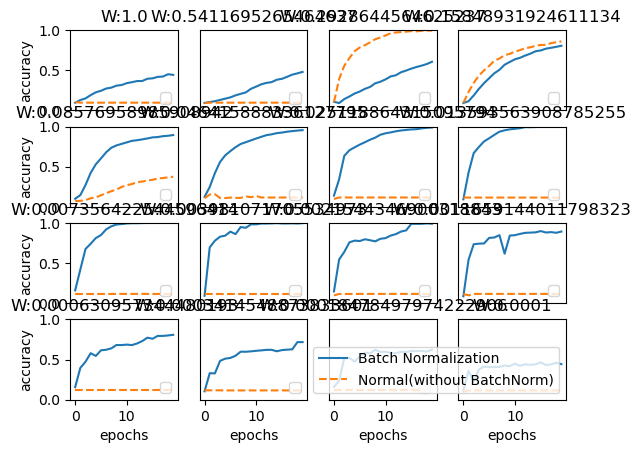

In [9]:
import sys, os

sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを最初の1000個
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std: float):
    bn_network = MultiLayerNetExtend(
        input_size=784,
        hidden_size_list=[100, 100, 100, 100, 100],
        output_size=10,
        weight_init_std=weight_init_std,
        use_batchnorm=True,
    )
    network = MultiLayerNetExtend(
        input_size=784,
        hidden_size_list=[100, 100, 100, 100, 100],
        output_size=10,
        weight_init_std=weight_init_std,
    )
    optimizer = SGD(lr=learning_rate)

    train_acc_list = []
    bn_train_acc_list = []

    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0

    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)

            print(
                "epoch:"
                + str(epoch_cnt)
                + " | "
                + str(train_acc)
                + " - "
                + str(bn_train_acc)
            )
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break

    return train_acc_list, bn_train_acc_list


weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print("============== " + str(i + 1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)

    plt.subplot(4, 4, i + 1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label="Batch Normalization", markevery=2)
        plt.plot(
            x,
            train_acc_list,
            linestyle="--",
            label="Normal(without BatchNorm)",
            markevery=2,
        )
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc="lower right")

plt.show()

epoch:0, train acc:0.12, test acc:0.1351
epoch:1, train acc:0.14666666666666667, test acc:0.1448
epoch:2, train acc:0.20333333333333334, test acc:0.1709
epoch:3, train acc:0.2733333333333333, test acc:0.2058
epoch:4, train acc:0.35, test acc:0.2369
epoch:5, train acc:0.38333333333333336, test acc:0.2577
epoch:6, train acc:0.41333333333333333, test acc:0.2836
epoch:7, train acc:0.44333333333333336, test acc:0.3011
epoch:8, train acc:0.47333333333333333, test acc:0.3312
epoch:9, train acc:0.49666666666666665, test acc:0.3579
epoch:10, train acc:0.5266666666666666, test acc:0.3867
epoch:11, train acc:0.5466666666666666, test acc:0.401
epoch:12, train acc:0.5366666666666666, test acc:0.4123
epoch:13, train acc:0.55, test acc:0.422
epoch:14, train acc:0.54, test acc:0.4256
epoch:15, train acc:0.5433333333333333, test acc:0.4352
epoch:16, train acc:0.5433333333333333, test acc:0.4393
epoch:17, train acc:0.5466666666666666, test acc:0.4489
epoch:18, train acc:0.56, test acc:0.4547
epoch:19, t

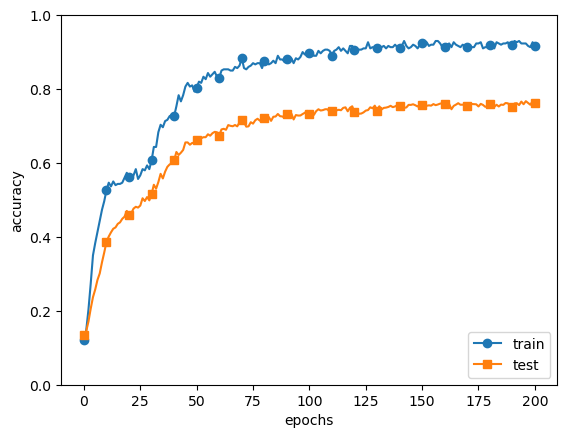

In [1]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
# weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(
    input_size=784,
    hidden_size_list=[100, 100, 100, 100, 100, 100],
    output_size=10,
    weight_decay_lambda=weight_decay_lambda,
)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print(
            "epoch:"
            + str(epoch_cnt)
            + ", train acc:"
            + str(train_acc)
            + ", test acc:"
            + str(test_acc)
        )

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {"train": "o", "test": "s"}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker="o", label="train", markevery=10)
plt.plot(x, test_acc_list, marker="s", label="test", markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc="lower right")
plt.show()

train loss:2.328969718366223
=== epoch:1, train acc:0.11333333333333333, test acc:0.1055 ===
train loss:2.3126430980228627
train loss:2.3142577581262596
train loss:2.314530660003328
=== epoch:2, train acc:0.11666666666666667, test acc:0.1073 ===
train loss:2.294807386248296
train loss:2.3154664058034187
train loss:2.302058200529325
=== epoch:3, train acc:0.11666666666666667, test acc:0.1069 ===
train loss:2.301959577610778
train loss:2.301434226626909
train loss:2.3007012285211883
=== epoch:4, train acc:0.11, test acc:0.1084 ===
train loss:2.307132165539309
train loss:2.3187622897230376
train loss:2.2905614089848942
=== epoch:5, train acc:0.11333333333333333, test acc:0.1097 ===
train loss:2.2834010849771182
train loss:2.3003876539639454
train loss:2.2924714677375047
=== epoch:6, train acc:0.11333333333333333, test acc:0.1101 ===
train loss:2.308253047877835
train loss:2.3084300016031656
train loss:2.2982698739290797
=== epoch:7, train acc:0.11, test acc:0.1099 ===
train loss:2.2888266

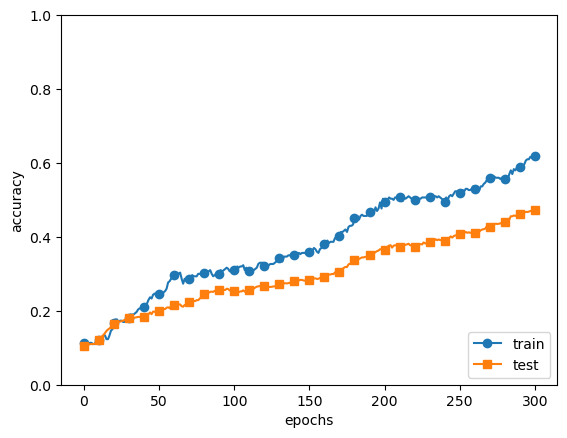

In [1]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# Dropuoutの有無、割り合いの設定 ========================
use_dropout = True  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(
    input_size=784,
    hidden_size_list=[100, 100, 100, 100, 100, 100],
    output_size=10,
    use_dropout=use_dropout,
    dropout_ration=dropout_ratio,
)
trainer = Trainer(
    network,
    x_train,
    t_train,
    x_test,
    t_test,
    epochs=301,
    mini_batch_size=100,
    optimizer="sgd",
    optimizer_param={"lr": 0.01},
    verbose=True,
)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {"train": "o", "test": "s"}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker="o", label="train", markevery=10)
plt.plot(x, test_acc_list, marker="s", label="test", markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc="lower right")
plt.show()